## 数据读取

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%atplotlib inline
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.sans-serif'] = ['SimHei']  #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  #用来正常显示负号

In [2]:
df = pd.read_csv('python_jobs.csv',
                 names=[
                     'job_name', 'job_salary', 'job_info', 'job_stars',
                     'job_category', 'job_description', 'job_contact',
                     'company_name', 'company_type', 'company_size',
                     'company_industry', 'company_introduction', 'job_link',
                     'company_url'
                 ])
df.head()

,job_name,job_salary,job_info,job_stars,job_category,job_description,job_contact,company_name,company_type,company_size,company_industry,company_introduction,job_link,company_url
0,Python开发工程师,0.6-1.2万/月,广州-黄埔区 | 3-4年经验 | 本科 | 招1人 | 08-30发布,"五险一金,员工旅游,交通补贴,餐饮补贴,通讯补贴,专业培训,绩效奖金,年终奖金,股票期权,弹性工作",Python开发工程师,"【岗位职责】,1、负责数据抓取平台规划和建设，完成数据采集与爬取、解析处理和入库；,2、研究...",神舟路19号3栋二层222号,广州欧赛斯信息科技有限公司,民营公司,50-150人,计算机软件\r\r\n ...,广州欧赛斯信息科技有限公司（OCS）成立于2012年，是一家专注于教育教学大数据的软件服务提...,https://jobs.51job.com/guangzhou-hpq/123273059...,https://jobs.51job.com/all/co3816201.html
1,Python开发工程师,4.5-8千/月,广州 | 1年经验 | 大专 | 招3人 | 08-30发布,"五险一金,绩效奖金,年终奖金",Python开发工程师,"岗位职责:,1. 为3D影视制作开发流程配套工具, 其包含独立工具, 影视工具插件。,2. ...",天河区怡祥盛达电子信息创新园C座三层,广州金川文化有限公司,民营公司,150-500人,影视/媒体/艺术/文化传播,每个人小时候都看过一部令他（她）难忘的动画电影，故事的记忆成为他（她）长大后为人处世标准的一...,https://jobs.51job.com/guangzhou/124980175.htm...,https://jobs.51job.com/all/co3226190.html
2,数据库财务实习生（Python工程师）2329 (职位编号：Meixin002329),2-3千/月,广州 | 在校生/应届生 | 大专 | 招1人 | 08-30发布,"五险一金,节日福利,带薪年假,专业培训,定期体检,员工旅游",计算机辅助设计工程师,"岗位职责:,1、日常薪酬數據采集，輸入，處理，加工，輸出等流程，包含入職，離職，人員資料變動...",越秀区中山六路218-222号 捷泰广场10楼,美心食品（广州）有限公司,外资（非欧美）,5000-10000人,餐饮业\r\r\n 快...,香港美心集团始创于1956年，至今已发展成具规模的多元化优质餐饮集团，截至2019年于中国港...,https://jobs.51job.com/guangzhou/124283855.htm...,https://jobs.51job.com/all/co255908.html
3,Python开发工程师 (职位编号：UR002262),1.3-1.8万/月,广州 | 3-4年经验 | 本科 | 招若干人 | 08-30发布,"五险一金,免费班车,员工旅游,交通补贴,年终奖金",Python开发工程师,"1.负责算法的开发，部署，优化等。,2.负责算法的行性评估和视觉硬件的选型。,3.对客户价值...",广州白云区云霄路91号,UR 快尚时装有限公司,民营公司,5000-10000人,服装/纺织/皮革,关于UR 公司创立于2006年，以提升人们的时尚生活品质为使命，中国首个全球化的时装品...,https://jobs.51job.com/guangzhou/124955221.htm...,https://jobs.51job.com/all/co2194550.html
4,Python工程师,1.2-1.6万/月,广州-天河区 | 招1人 | 08-30发布,"五险一金,专业培训,年终奖金,定期体检",软件工程师,"1 参与爬虫，数据解析和分析等功能的研发；,2 负责分析结果的展示；, 3 负...",冼村路5号凯华国际大厦18楼,广州市欢雀科技有限公司,民营公司,50-150人,互联网/电子商务,广州市欢雀科技有限公司是互联网企业级服务提供者，聚焦企业薪酬福利管理方向，依托母公司广东知名...,https://jobs.51job.com/guangzhou-thq/112940445...,https://jobs.51job.com/all/co3997037.html


In [3]:
df.shape

(3407, 14)

In [4]:
df.isnull().sum()

job_name                  0
job_salary                0
job_info                  0
job_stars               476
job_category              0
job_description         321
job_contact               0
company_name              0
company_type              0
company_size             20
company_industry          0
company_introduction      0
job_link                  0
company_url               0
dtype: int64

In [5]:
df.isnull().sum()/df.count()

job_name                0.000000
job_salary              0.000000
job_info                0.000000
job_stars               0.162402
job_category            0.000000
job_description         0.104018
job_contact             0.000000
company_name            0.000000
company_type            0.000000
company_size            0.005905
company_industry        0.000000
company_introduction    0.000000
job_link                0.000000
company_url             0.000000
dtype: float64

## 数据清洗

In [5]:
# 删除联系方式，工作和公司链接的列，只作为分析之外使用
df = df.drop(['job_contact', 'job_link', 'company_url'], axis=1)

In [6]:
# 数据在不同天采集，有重复，要删除
df = df.drop_duplicates(subset=['job_name', 'company_name'], keep='last')

In [7]:
# 去掉按天，按时计薪的工作
df = df[~df['job_salary'].str.endswith('元/天')]
df = df[~df['job_salary'].str.endswith('元/小时')]
df = df[~df['job_salary'].str.endswith('万以上/月')]

In [8]:
# 区分薪酬区间
df['min_salary'] = 1
df['max_salary'] = 1

In [9]:
# 处理薪酬的函数
def parse_salary(sr):
    if sr.endswith('万/年'):
        sr = sr.replace('万/年', '')
        min_salary, max_salary = sr.split('-')
        min_salary = round(float(min_salary) * 10000 / 12)
        max_salary = round(float(max_salary) * 10000 / 12)
        return min_salary, max_salary
    elif sr.endswith('万/月'):
        sr = sr.replace('万/月', '')
        min_salary, max_salary = sr.split('-')
        min_salary = round(float(min_salary) * 10000)
        max_salary = round(float(max_salary) * 10000)
        return min_salary, max_salary
    elif sr.endswith('千/月'):
        sr = sr.replace('千/月', '')
        min_salary, max_salary = sr.split('-')
        min_salary = round(float(min_salary) * 1000)
        max_salary = round(float(max_salary) * 1000)
        return min_salary, max_salary
    else:
        return np.nan, np.nan

In [10]:
# 得到薪酬区间
temp_df = df['job_salary'].apply(parse_salary)

df['min_salary'] = temp_df.apply(lambda x: x[0])
df['max_salary'] = temp_df.apply(lambda x: x[1])

In [11]:
df = df.drop('job_salary', axis=1)
df.sample(5)

,job_name,job_info,job_stars,job_category,job_description,company_name,company_type,company_size,company_industry,company_introduction,min_salary,max_salary
1260,数据分析工程师,广州 | 1年经验 | 本科 | 招若干人 | 08-18发布,"双休,近地铁,员工食堂,节日福利,绩效工资,五险一金,交通补贴,餐饮补贴,通讯补贴,定期体检",数据分析师,"一、岗位职责：,1.负责的日常数据监控和分析研究，发现产品问题和用户变化并提出建议，为产品和...",广东南粤通客运联网中心有限公司,国企,50-150人,交通/运输/物流\r\r\n ...,公司成立于2014年11月，在省交通运输厅指导下建设运营全省汽车客运联网售票平台，打造全省客...,10000,15000
1243,服务器开发工程师,广州-天河区 | 2年经验 | 大专 | 招1人 | 08-19发布,"员工旅游,周末双休,带薪年假,节日福利,部门经费,定期体检,出国机会,年终奖金,五险一金,包晚餐","游戏开发工程师,游戏服务端开发工程师","岗位职责：,1、负责公司的产品的服务器开发与运维；,2、使用各种监控工具及设计系统与架构，保...",广州游尚网络科技有限公司,民营公司,少于50人,网络游戏\r\r\n ...,【公司简介】广州游尚网络科技有限公司成立于2017年1月，总部位于广州。核心团队成员均来自于...,6000,12000
2458,python教研,广州 | 3-4年经验 | 本科 | 招1人 | 09-01发布,"五险一金,绩效奖金,弹性工作,专业培训,通讯补贴,双休",其他,"1、 4-10岁幼少儿图形化编程教育课程研发以及优化工作；,2、 10岁以上青少年代码编程教...",三七互娱,上市公司,1000-5000人,网络游戏,三七互娱，全球TOP25上市游戏企业，位列中国第三，凭借优异业绩被纳入中证沪深300指数、明...,8000,12000
1880,测试工程师,广州-天河区 | 2年经验 | 本科 | 招2人 | 08-29发布,"免费班车,餐饮补贴,五险一金,员工旅游,通讯补贴,绩效奖金,定期体检,朝九晚六,节日福利,带薪年假",测试工程师,"岗位职责：,1、按照产品和项目要求，制定和更新测试计划，设计测试用例，并按计划执行测试工作；...",广州新科佳都科技有限公司,上市公司,500-1000人,计算机软件\r\r\n ...,广州新科佳都科技有限公司（简称：新科佳都）是上市公司佳都新太科技股份有限公司（股票代码：60...,10000,15000
2682,运维工程师,广州 | 3-4年经验 | 本科 | 招1人 | 09-01发布,NaN,技术支持/维护工程师,"岗位职责:,1.负责维护，持续优化持续集成系统，负责项目发布管理。,2.负责设计用例自动化测...",上海联蔚信息科技有限公司,民营公司,1000-5000人,计算机软件\r\r\n ...,公司介绍上海联蔚信息科技有限公司(简称：联蔚科技，英文名称：Shanghai Connext...,13000,18000


In [12]:
# 中位数薪酬更有参考意义
df['mid_salary'] = (df['min_salary'] + df['max_salary']) / 2

In [13]:
# 处理工作基本信息的函数
def parse_info(sr):
    lst = sr.split('|')
    place = lst[0].strip()
    exp_years = lst[1].strip()
    education = lst[2].strip()
    return place, exp_years, education

In [14]:
# 得到工作地，工作经验，学历要求信息
temp_df = df['job_info'].apply(parse_info)

df['place'] = temp_df.apply(lambda x: x[0])
df['exp_years'] = temp_df.apply(lambda x: x[1])
df['education'] = temp_df.apply(lambda x: x[2])

In [15]:
# 有些信息错位，要再处理
df['exp_years'] = df['exp_years'].str.replace(r'招.+', 'NA')
df['exp_years'] = df['exp_years'].str.replace(r'本科|大专|硕士|博士', 'NA')

df['education'] = df['education'].str.replace(r'招.+', 'NA')
df['education'] = df['education'].str.replace(r'.*?发布', 'NA')

In [16]:
df = df.drop('job_info', axis=1)
df.sample(5)

,job_name,job_stars,job_category,job_description,company_name,company_type,company_size,company_industry,company_introduction,min_salary,max_salary,mid_salary,place,exp_years,education
926,运营专员（数据分析方向）,"员工旅游,专业培训,绩效奖金,年终奖金,社保,国家法定假,月度达标奖金,年度达标奖金,员工生...","数据运营,数据分析师",NaN,广州吉吉姐品牌管理有限公司,民营公司,50-150人,互联网/电子商务,「吉吉姐品牌管理有限公司」创立于2014年公司介绍：我们是国内第二大自营跨境电商零售平台——...,5000,10000,7500.0,广州-海珠区,1年经验,大专
591,接口自动化测试工程师,"周末双休,带薪年假,五险一金,餐饮补贴,年终奖金,节日福利,全勤奖",自动化测试,"岗位职责：,1.负责产品移动端/PC端、以及后台服务/模块的测试工作；,2.根据项目计划制定...",广州天鹏计算机科技有限公司,民营公司,150-500人,计算机软件\r\r\n ...,公司介绍 广州天鹏计算机科技有限公司（下称“天鹏大数据”）是一家专注于健康医疗“新基建...,8000,10000,9000.0,广州-天河区,3-4年经验,本科
1978,大数据算法工程师,"五险一金,专业培训,绩效奖金,高温补贴,弹性工作","算法工程师,大数据开发工程师","岗位职责：,1. 负责大数据算法框架体系设计和相关技术路线规划、设计和实现；,2. 根据业务...",恒峰信息技术有限公司,上市公司,150-500人,计算机服务(系统、数据服务、维修)\r\r\n ...,【公司简介】 恒峰信息技术有限公司，成立于2003年1月，注册资本2.83亿元，...,15000,30000,22500.0,广州-黄埔区,5-7年经验,本科
1502,高级python开发工程师,"五险一金,定期体检,节日福利,周末双休,健康下午茶,提供午餐",脚本开发工程师,"岗位职责：,1、根据公司需求,配合其他部门进行自动化脚本开发；,2、负责脚本框架的搭建和脚本...",广州网融信息技术有限公司,民营公司,50-150人,互联网/电子商务\r\r\n ...,广州网融信息技术有限公司（G4B）创建于2006年，现已发展成为中国领先的企业全生命周期管理...,15000,20000,17500.0,广州-海珠区,3-4年经验,大专
1646,爬虫开发工程师,"五险一金,定期体检,餐饮补贴,节日福利,周末双休",爬虫开发工程师,"岗位职责：,1、负责设计和开发通用爬虫脚本，提取分析各种平台页面内容；,2、研究各类网站、链...",广州网融信息技术有限公司,民营公司,50-150人,互联网/电子商务\r\r\n ...,广州网融信息技术有限公司（G4B）创建于2006年，现已发展成为中国领先的企业全生命周期管理...,5000,6000,5500.0,广州-海珠区,1年经验,本科


In [17]:
# 筛选掉非广州地区的
df = df[df['place'].str.startswith('广州')]
df.shape

(2240, 15)

In [18]:
# 检查其它数据
df['company_name'].unique().shape

(1354,)

In [19]:
df['job_name'].unique().shape

(1429,)

In [20]:
df['job_category'].unique().shape

(639,)

In [23]:
df['company_industry'] = df['company_industry'].str.replace('\r',
                                                            '').str.replace(
                                                                ' ', '')
df['company_industry'] = df['company_industry'].str.replace('\n', ',')
df['company_industry'].unique().shape

(314,)

In [24]:
df.to_csv(r'python_jobs_format.csv', index=False)

 - 2240职位名，1460公司名，1517工作名无法作为机器学习的特征
 - 职位分类和行业经过处理后可能可以作为机器学习的特征
 - 职位描述特征化，可以产生过多特征，要增加数据行，要采集全国的数据来做完整的机器学习

## 数据可视化

### 1.公司类型

In [25]:
type_sr = df['company_type'].value_counts()

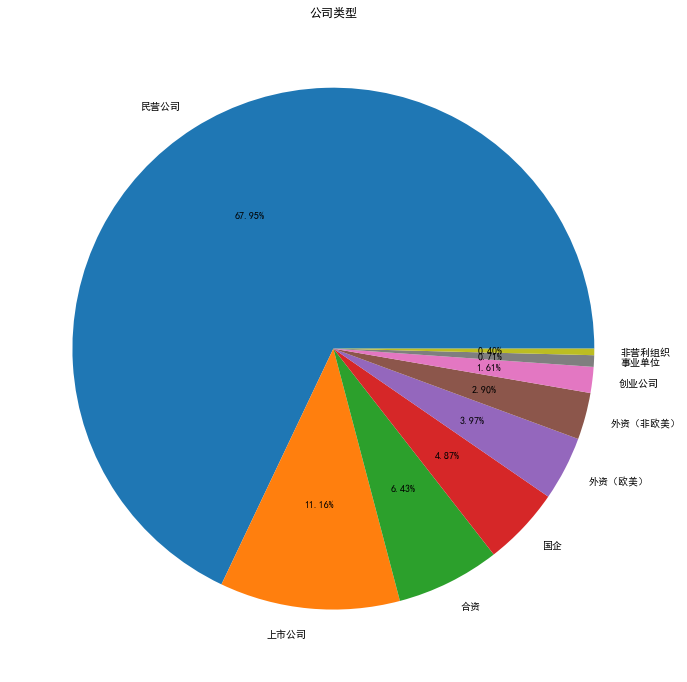

In [26]:
type_sr.plot.pie(figsize=(12, 12), autopct='%.2f%%')
plt.title("公司类型")
plt.ylabel('')
plt.savefig('python_company_type.png', dpi=300, bbox_inches='tight')

In [27]:
df[df['company_type'] == '上市公司']['company_type'].count()

250

 - 在广州三天的Pytho职位数据中，2240个职位有11%，250家上市公司，算比较多。
 - 投简历按自己想去的公司类型去投，实在没有面试机会就选上民营，民营公司中什么条件的公司都有。

### 2.公司规模

In [28]:
size_sr = df['company_size'].value_counts()

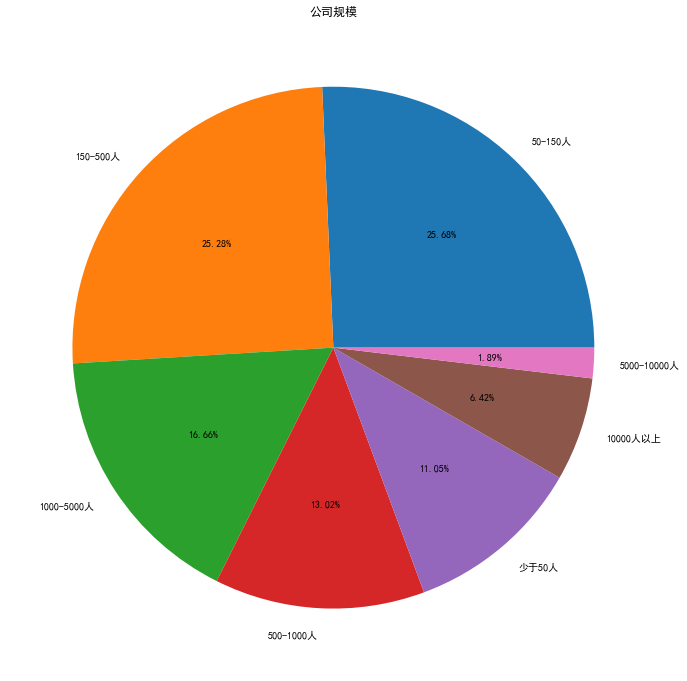

In [29]:
size_sr.plot.pie(figsize=(12, 12), autopct='%.2f%%')
plt.title("公司规模")
plt.ylabel('')
plt.savefig('python_company_size.png', dpi=300, bbox_inches='tight')

In [30]:
# 少于500人公司的比例
less_500 = df['company_size'].str.contains('少于50人|50-150人|150-500人').mean()
less_500

0.6201167489896722

In [31]:
# 大于500人公司的比例
1 - less_500

0.3798832510103278

 - 在广州三天的Pytho职位数据中，一半的公司在50-150人和150-500人之间。
 - 150人以下的公司对人个而言太小，有38%的公司大于500人，筛选时至少要在150人以上的公司

### 3.公司规模

In [32]:
place_sr = df['place'].value_counts()

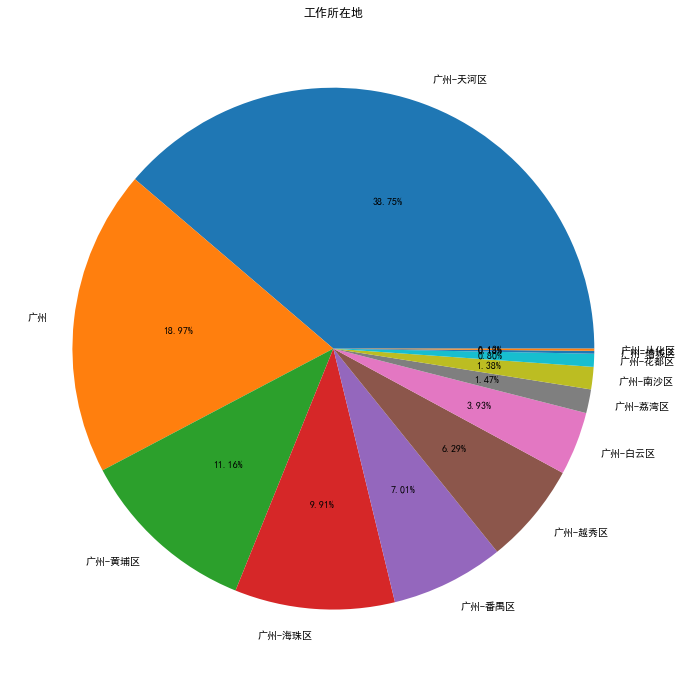

In [33]:
place_sr.plot.pie(figsize=(12, 12), autopct='%.2f%%')
plt.title("工作所在地")
plt.ylabel('')
plt.savefig('python_job_place.png', dpi=300, bbox_inches='tight')

In [34]:
# 核心区工作数量比例
core_4 = df['place'].str.contains('广州-天河区|广州-越秀区|广州-荔湾区|广州-海珠区').mean()
core_4

0.5642857142857143

 - 在广州三天的Pytho职位数据中，核心城区4区的职位已经有56%。
 - 如果加上番禺区和未细分区域的职位已经有很多工作了，没有必要去边远的地方面试。

### 4.工作经验要求

In [35]:
exp_sr = df['exp_years'].value_counts()

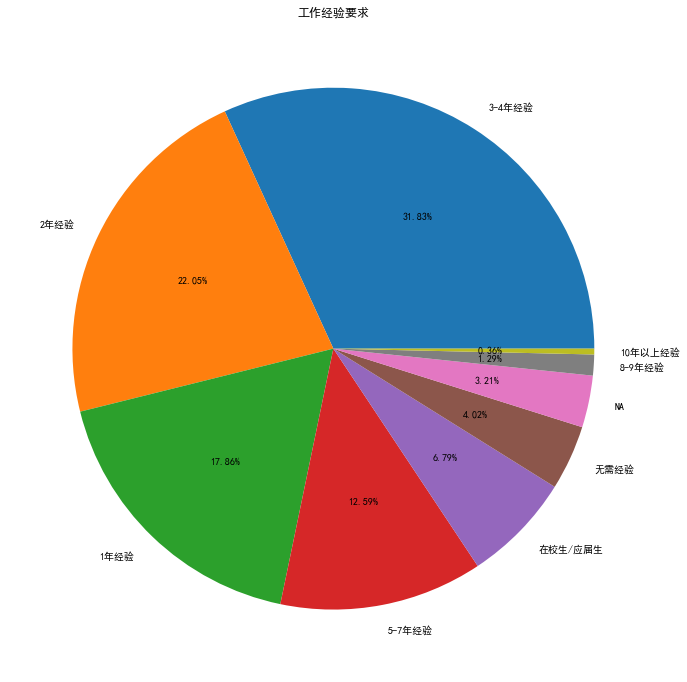

In [36]:
exp_sr.plot.pie(figsize=(12, 12), autopct='%.2f%%')
plt.title("工作经验要求")
plt.ylabel('')
plt.savefig('python_exp_years.png', dpi=300, bbox_inches='tight')

In [37]:
# 写无需经验的，其实内含都有一个经验要求
# 1-2年的占比
year2 = df['exp_years'].str.contains('1年经验|2年经验').mean()
year2

0.3991071428571429

In [38]:
# 1-4年的占比
year4 = df['exp_years'].str.contains('1年经验|2年经验|3-4年经验').mean()
year4

0.7174107142857142

 - 在广州三天的Pytho职位数据中，如果工作经验有2年则达到了39%工作的要求，如果工作经验有3年则达到71%工作的要求
 - 所以通过学习两门微专业，在面试时声称自己的经验有3年是必要的

### 5.学历要求

In [39]:
edu_sr = df['education'].value_counts()

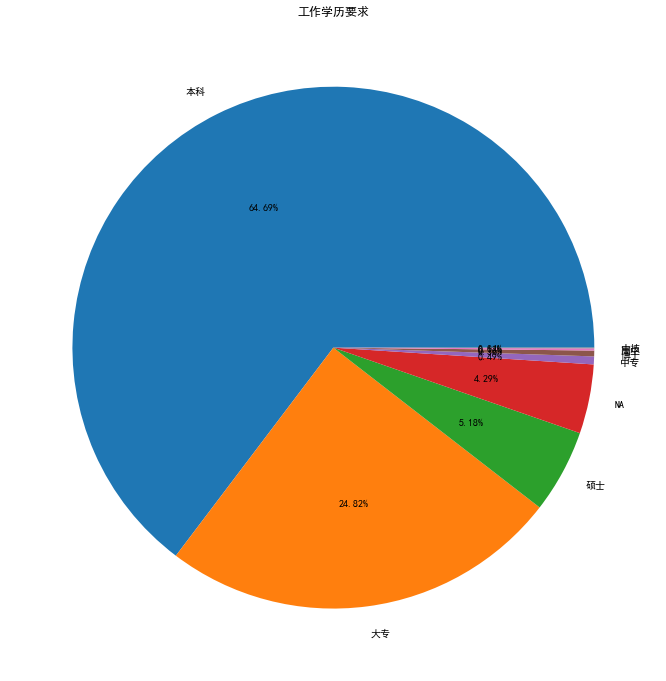

In [40]:
edu_sr.plot.pie(figsize=(12, 12), autopct='%.2f%%')
plt.title("工作学历要求")
plt.ylabel('')
plt.savefig('python_edu_require.png', dpi=300, bbox_inches='tight')

 - 在广州三天的Pytho职位数据中，如果有本科学历则达到89%的职位要求。
 - 没要必要相信HR说公司很多硕士，本科很Low的话。

### 6.中位薪酬

In [41]:
# 中位薪酬的平均数
df['mid_salary'].mean()

14460.595535714287

In [42]:
# 中位薪酬的最大值
df['mid_salary'].max()

100000.0

In [43]:
# 中位薪酬的最小值
df['mid_salary'].min()

1500.0

In [44]:
# 中位薪酬的中位数
df['mid_salary'].median()

12500.0

In [45]:
# 中位薪酬的众数
df['mid_salary'].mode()[0]

12500.0

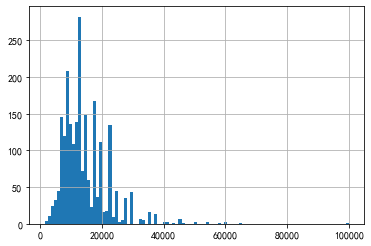

In [46]:
df['mid_salary'].hist(bins=100)

In [47]:
# 离散数据处理
df[df['mid_salary'] > 40000] = 40000

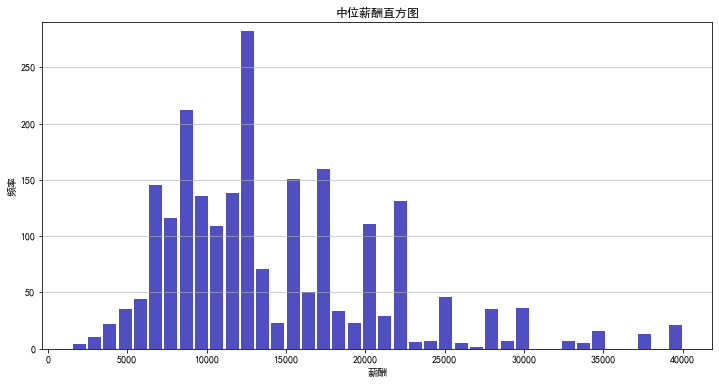

In [48]:
#  matplotlib.axes.Axes.hist() 方法的接口
plt.figure(figsize=(12, 6))
n, bins, patches = plt.hist(x=df['mid_salary'],
                            bins=40,
                            color='#0504aa',
                            alpha=0.7,
                            rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('薪酬')
plt.ylabel('频率')
plt.title('中位薪酬直方图')

# 设置y轴的上限
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.savefig('python_salary_hist.png', dpi=300, bbox_inches='tight')

 - 薪酬在后台设置中有几个默认区间的，这导致通过区间最高薪酬最低薪酬计算出来的中位薪酬形成几个跳增点，分别是13000元、17000元、22000元。
 - 根据自己的能力和面试情况，谈薪酬可以这样跳动价格13000、15000、18000、20000、23000、25000元。

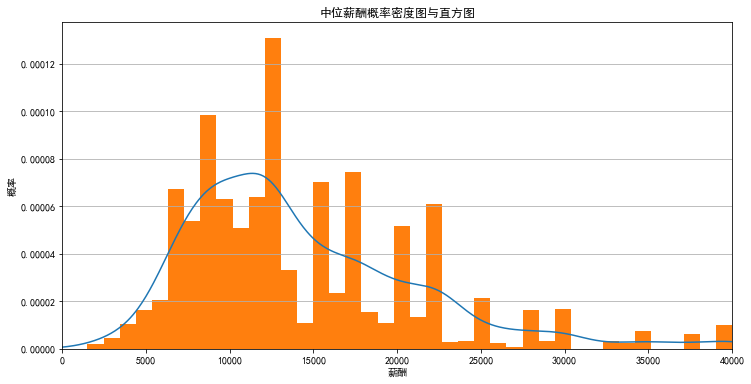

In [49]:
fig, ax = plt.subplots(figsize=(12, 6))
df['mid_salary'].plot.kde(ax=ax, legend=False, title='中位薪酬概率密度图与直方图')
df['mid_salary'].plot.hist(density=True, ax=ax, bins=40)
ax.set_ylabel('概率')
ax.set_xlabel('薪酬')
ax.set_xlim([0, 40000])
ax.grid(axis='y')
fig = plt.gcf()
fig.savefig('python_salary_kde.png', dpi=300, bbox_inches='tight')

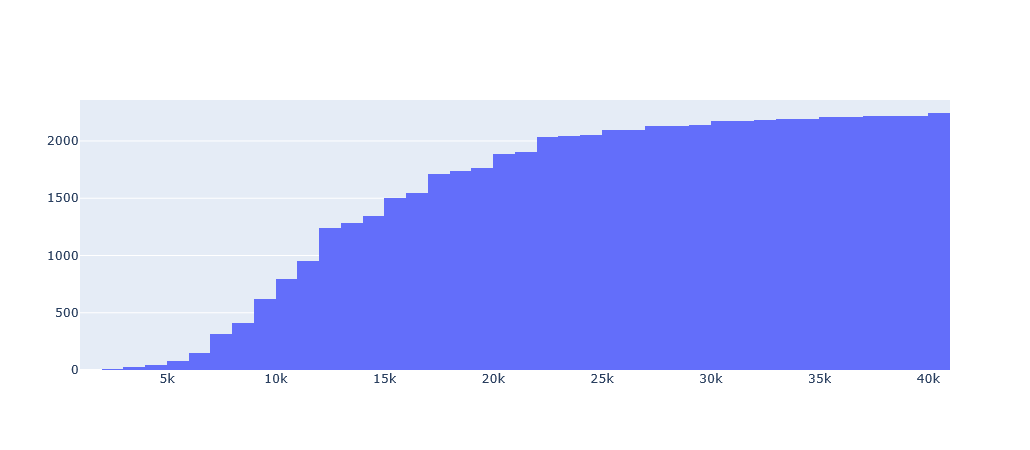

In [53]:
import plotly.graph_objs as go
from plotly.offline import iplot
h = go.Histogram(
    x=df['mid_salary'],
    cumulative_enabled=True,
)
iplot([h])

 - 工资如果有15K，则超过67%的工作的薪酬
 - 工资如果有18K，则超过78%的工作的薪酬
 - 工资如果有20K，则超过84%的工作的薪酬

## 职位描述关键词分析

### 1.中文部分

In [57]:
# 读取为停用词集合
def get_stopwords(path):
    stopwords = set()
    f = open(path, encoding='utf-8')
    while True:
        word = f.readline()
        if word == '':
            break
        stopwords.add(word[:-1])


#     print(stopwords)
    return stopwords

In [58]:
# 将列表中转换为字符串
jd_list = df['job_description'].values.tolist()
jd_all = ''
for i in range(len(jd_list)):
    jd_all += str(jd_list[i]).strip()

In [59]:
# 使用jieba分词，并获得词频排列列表
import jieba.analyse
result = jieba.analyse.textrank(jd_all,
                                topK=200,
                                withWeight=True,
                                allowPOS=['n', 'v', 'a'])

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Articuly\AppData\Local\Temp\jieba.cache
Loading model cost 1.084 seconds.
Prefix dict has been built successfully.


In [60]:
# 关键词中删除停用词
keywords = {}
for k in result:
    keywords[k[0]] = k[1]  # 把列表里的二元组形成字典
stopwords = get_stopwords(r'./job_stopwords.txt')
# print('before delete stopword:', keywords)
keywords = {x: keywords[x] for x in keywords if x not in stopwords}
print('after delete stopword:', keywords)

after delete stopword: {'数据': 0.9349182037388923, '技术': 0.719402266293291, '系统': 0.6248077483091913, '项目': 0.596287149789469, '产品': 0.5517524895702894, '业务': 0.4609313149878675, '学习': 0.4397452514546201, '团队': 0.41583935703656955, '需求': 0.3845997228637214, '算法': 0.3766351887754582, '沟通': 0.3742137999581363, '运维': 0.326535474303301, '编写': 0.2721290240255885, '数据库': 0.2515387504322475, '维护': 0.24628985248217242, '流程': 0.235827726143, '员工': 0.2279449284195435, '工具': 0.22510162705415904, '用户': 0.21292072139560939, '熟练': 0.21129218486151347, '文档': 0.20778621478257753, '行业': 0.20309110838927308, '计算机': 0.2028941110793694, '性能': 0.20229753672158038, '软件': 0.19646127829713184, '编程': 0.19017927567126844, '独立': 0.17837386712571116, '较强': 0.17755378265639904, '架构': 0.17606083618883106, '方案': 0.16927714053697832, '客户': 0.1684819791743066, '解决': 0.1654189012575744, '模型': 0.16234282757033017, '包括': 0.16048316165749252, '游戏': 0.1582507425088289, '网络': 0.15118912944793028, '框架': 0.14739961986535832, '

In [61]:
def make_wordcloud(keywords, stopwords, path):
    from wordcloud import WordCloud
    wordcloud = WordCloud(font_path='simhei.ttf',
                          background_color='white',
                          max_font_size=80,
                          stopwords=stopwords)
    word_frequence = keywords
    myword = wordcloud.fit_words(word_frequence)
    plt.figure(figsize=(20, 15))
    plt.axis('off')
    plt.imshow(myword)
    plt.savefig(path, dpi=300, bbox_inches='tight')

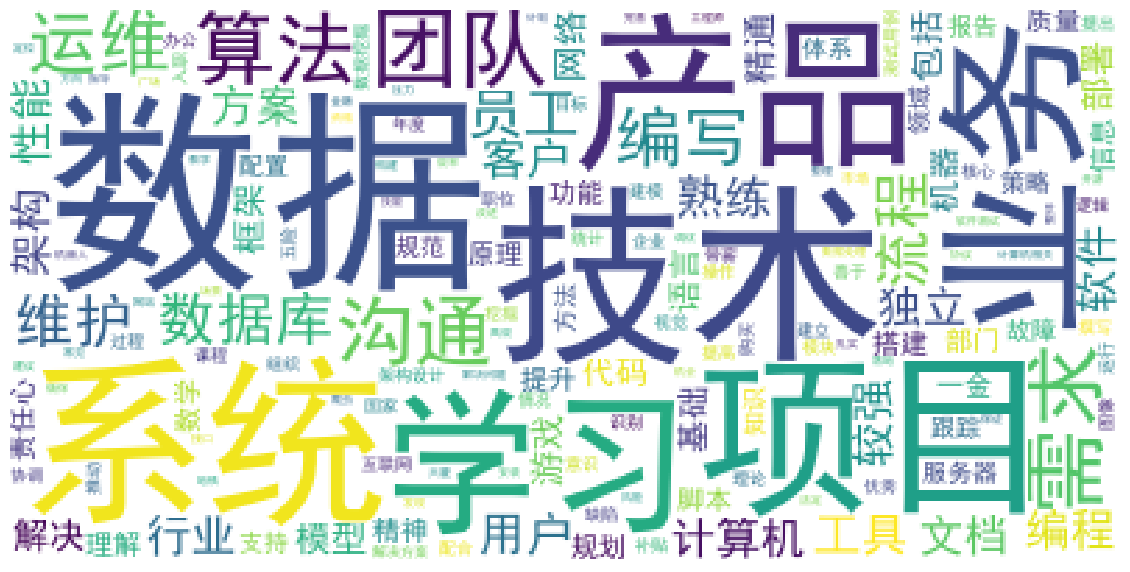

In [62]:
make_wordcloud(keywords=keywords, stopwords=stopwords, path='python职位中文词云.png')

In [63]:
with open('python职位中文关键词权重.txt', 'w') as f:
    for k, v in keywords.items():
        f.write('{0} {1:.2f}%\n'.format(k, v * 100))

### 2.英文部分

In [64]:
def find_unchinese(str):
    # 去除中文字符
    pattern = re.compile(r'[\u4e00-\u9fa5]+')
    unchinese = re.sub(pattern, "", str)
    # 去除中文标点
    unchinese = re.sub(
        r'[＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､\u3000、〃〈〉《》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏﹑﹔·！？｡。]',
        ' ', unchinese)
    # 去除网页空格符
    unchinese = unchinese.replace('\xa0', ' ')
    # 去除部分英文标点
    unchinese = re.sub(r'[0-9\.,/\\\(\)\?\*-=%~]', ' ', unchinese)
    #     print(unchinese)
    return unchinese

In [65]:
# 保留英文字符，并转成小写
en_jd_all = find_unchinese(jd_all)
en_jd_all = en_jd_all.lower()

In [66]:
# 分词，形成列表
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp(en_jd_all)
keywords_en = doc.text.split()

In [67]:
# 过滤停用词
stopwords = get_stopwords(r'./job_stopwords.txt')
keywords_en = [x for x in keywords_en if x not in stopwords]

In [68]:
# 统计关键词频率
from collections import Counter
counter = Counter(keywords_en)
keywords_en_count = counter.most_common(100)
print(keywords_en_count)

[('python', 1820), ('linux', 902), ('c', 890), ('java', 720), ('mysql', 597), ('sql', 478), ('shell', 465), ('web', 338), ('oracle', 277), ('redis', 274), ('hadoop', 228), ('spark', 221), ('php', 218), ('tcp', 176), ('nginx', 170), ('js', 170), ('r', 166), ('html', 165), ('mongodb', 163), ('perl', 153), ('hive', 152), ('javascript', 151), ('ip', 151), ('http', 146), ('docker', 144), ('css', 137), ('etl', 121), ('app', 115), ('hbase', 113), ('kafka', 112), ('bug', 109), ('c#', 106), ('excel', 101), ('git', 99), ('tensorflow', 97), ('tomcat', 96), ('spring', 94), ('zabbix', 93), ('windows', 86), ('jmeter', 85), ('vue', 84), ('ansible', 81), ('bi', 80), ('matlab', 78), ('server', 76), ('selenium', 76), ('ai', 73), ('jenkins', 72), ('devops', 72), ('api', 69), ('scala', 69), ('unix', 67), ('django', 65), ('loadrunner', 65), ('android', 59), ('ruby', 59), ('opencv', 59), ('flask', 57), ('sas', 56), ('es', 55), ('spss', 55), ('ui', 55), ('node', 54), ('caffe', 54), ('react', 53), ('elasticse

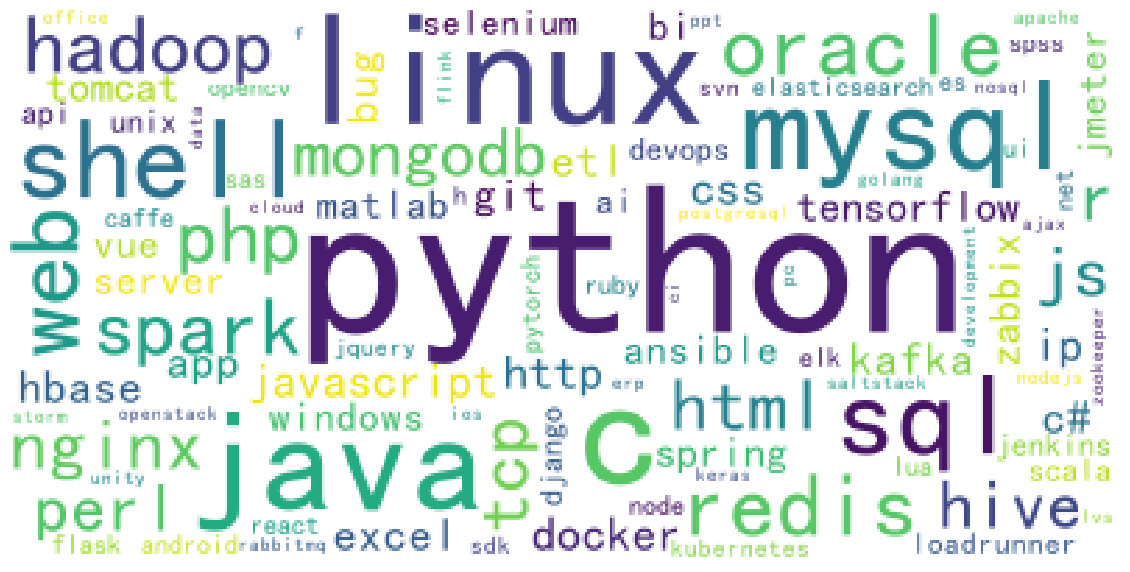

In [69]:
keywords_en_count = dict(keywords_en_count)
make_wordcloud(keywords=keywords_en_count,
               stopwords=stopwords,
               path='python职位英文词云')

In [70]:
with open('python职位英文关键词频率.txt', 'w') as f:
    for k, v in keywords_en_count.items():
        f.write('{0} {1}\n'.format(k, v))